In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('ISEAR_only_text_pt_data_augmentation.csv',sep=";")

# Get the label column
labels = data['sentiment']
label_counts = labels.value_counts()
colors = np.array([[100, 149, 237], [182, 208, 226], [135, 206, 235] ,[115, 147, 179], [173, 216, 230],  [204, 204, 255], [111, 143, 175]])
colors = (colors / 255)

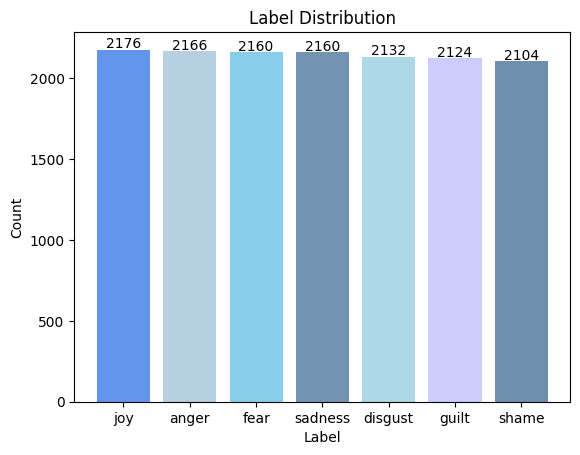

In [56]:
for i, v in enumerate(label_counts.values):
    plt.text(i, v+10, str(v), ha='center')
plt.bar(label_counts.index, label_counts.values,color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()